In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

In [2]:
#伝達関数の分子・分母多項式を与える
num = [1] #分子多項式
den = [1, 2, 1] #分母多項式

#コントローラのパラメータを与える
K1 = 1.0 #K = 1.0
K2 = 2.4 #K = 2.4
K3 = 3.0 #K = 3.0

#コントローラの分子・分母多項式を与える
numc1 = [K1] #K=1の場合の分子多項式
numc2 = [K2] #K=2.4の場合の分子多項式
numc3 = [K3] #K=3の場合の分子多項式
denc = [1, 0.1] #分母多項式

#制御対象とコントローラの伝達関数表現を与える
sys = matlab.tf(num, den) #制御対象の伝達関数表現 
cont1 = matlab.tf(numc1, denc) #K=1の場合のコントローラの伝達関数表現 
cont2 = matlab.tf(numc2, denc) #K=2.4の場合のコントローラの伝達関数表現  
cont3 = matlab.tf(numc3, denc) #K=3の場合のコントローラの伝達関数表現  

#開ループ伝達関数を求める
sysL1 = matlab.series(sys, cont1) #K=1の場合の開ループ伝達関数
sysL2 = matlab.series(sys, cont2) #K=2.4の場合の開ループ伝達関数
sysL3 = matlab.series(sys, cont3) #K=3の場合の開ループ伝達関数

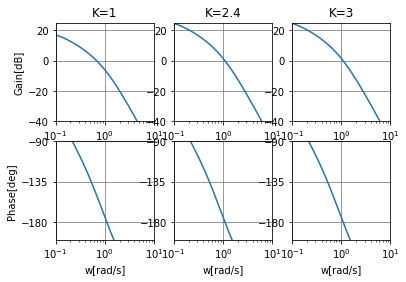

In [3]:
#図13.12のプロット

#開ループ伝達関数の処理
[numL11, denL11] = matlab.tfdata(sysL1) #開ループ伝達関数L_1(s)の分子・分母多項式を抜き出す
numL1 = numL11[0][0] #分子多項式におけるPythonの配列の処理
denL1 = denL11[0][0] #分母多項式におけるPythonの配列の処理

[numL22, denL22] = matlab.tfdata(sysL2) #開ループ伝達関数L_2(s)の分子・分母多項式を抜き出す
numL2 = numL22[0][0] #分子多項式におけるPythonの配列の処理
denL2 = denL22[0][0] #分母多項式におけるPythonの配列の処理

[numL33, denL33] = matlab.tfdata(sysL3) #開ループ伝達関数L_3(s)の分子・分母多項式を抜き出す
numL3 = numL33[0][0] #分子多項式におけるPythonの配列の処理
denL3 = denL33[0][0] #分母多項式におけるPythonの配列の処理

#開ループ伝達関数を与える
sysLG1 = signal.lti(numL1, denL1) #L_1(s)の場合の伝達関数表現（signal.ltiの場合）
sysLG2 = signal.lti(numL2, denL2) #L_2(s)の場合の伝達関数表現（signal.ltiの場合）
sysLG3 = signal.lti(numL2, denL2) #L_3(s)の場合の伝達関数表現（signal.ltiの場合）

#角周波数の範囲を指定
w = np.logspace(-1, 10, 1000)#対数的に等間隔なベクトルの生成(10^{-1}から10^{1}で1000点)

#図13.12(a)のプロット

#ゲインと位相の計算
wL1, gainL1, phaseL1 = signal.bode(sysLG1, w) #ゲインと位相

#図13.12(a)のプロット
plt.subplot(2, 3, 1) #複数の図を並べるためのコマンド．2行3列の1行1列目という意味
plt.semilogx(wL1, gainL1) #ゲイン線図をプロット
plt.xlim([0.1,10]) #横軸（角周波数）の範囲の指定
plt.ylim([-40,25]) #縦軸の範囲の指定
plt.yticks([-40,-20,0,20]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("K=1") #タイトルの表示

plt.subplot(2, 3, 4) #複数の図を並べるためのコマンド．2行3列の2行1列目という意味
plt.semilogx(wL1, phaseL1) #位相線図をプロット
plt.xlim([0.1,10])#横軸（角周波数）の範囲の指定
plt.ylim([-200,-90]) #縦軸の範囲の指定
plt.yticks([-180,-135,-90]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示

#図13.12(b)

#ゲインと位相の計算
wL2, gainL2, phaseL2 = signal.bode(sysLG2, w) #ゲインと位相

#図13.12(b)のプロット
plt.subplot(2, 3, 2) #複数の図を並べるためのコマンド．2行3列の1行2列目という意味
plt.semilogx(wL2, gainL2) #ゲイン線図をプロット
plt.xlim([0.1,10]) #横軸（角周波数）の範囲の指定
plt.ylim([-40,25]) #縦軸の範囲の指定
#plt.yticks([-40,-20,0,20]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("K=2.4") #タイトルの表示

plt.subplot(2, 3, 5) #複数の図を並べるためのコマンド．2行3列の2行2列目という意味
plt.semilogx(wL2, phaseL2) #位相線図をプロット
plt.xlim([0.1,10])#横軸（角周波数）の範囲の指定
plt.ylim([-200,-90]) #縦軸の範囲の指定
plt.yticks([-180,-135,-90]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Phase[deg]") #縦軸のラベル表示

#図13.12(c)

#ゲインと位相の計算
wL3, gainL3, phaseL3 = signal.bode(sysLG3, w) #ゲインと位相

plt.subplot(2, 3, 3) #複数の図を並べるためのコマンド．2行3列の1行3列目という意味
plt.semilogx(wL3, gainL3) #ゲイン線図をプロット
plt.xlim([0.1,10]) #横軸（角周波数）の範囲の指定
plt.ylim([-40,25]) #縦軸の範囲の指定
#plt.yticks([-40,-20,0,20]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("K=3") #タイトルの表示

# L_{3}の位相線図のプロット
plt.subplot(2, 3, 6) #複数の図を並べるためのコマンド．2行3列の2行3列目という意味
plt.semilogx(wL3, phaseL3) #位相線図をプロット
plt.xlim([0.1,10])#横軸（角周波数）の範囲の指定
plt.ylim([-200,-90]) #縦軸の範囲の指定
plt.yticks([-180,-135,-90]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Phase[deg]") #縦軸のラベル表示

plt.show()